In [14]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

In [2]:
ticker = "MSFT"

data = yf.download(ticker, start="2021-06-01", end="2025-01-01")
data = data[['Close']]

data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,MSFT
Date,
2021-06-01,239.764816
2021-06-02,239.667938
2021-06-03,238.126984
2021-06-04,243.050201
2021-06-07,245.976990
...,...
2024-12-24,438.450836
2024-12-26,437.233276


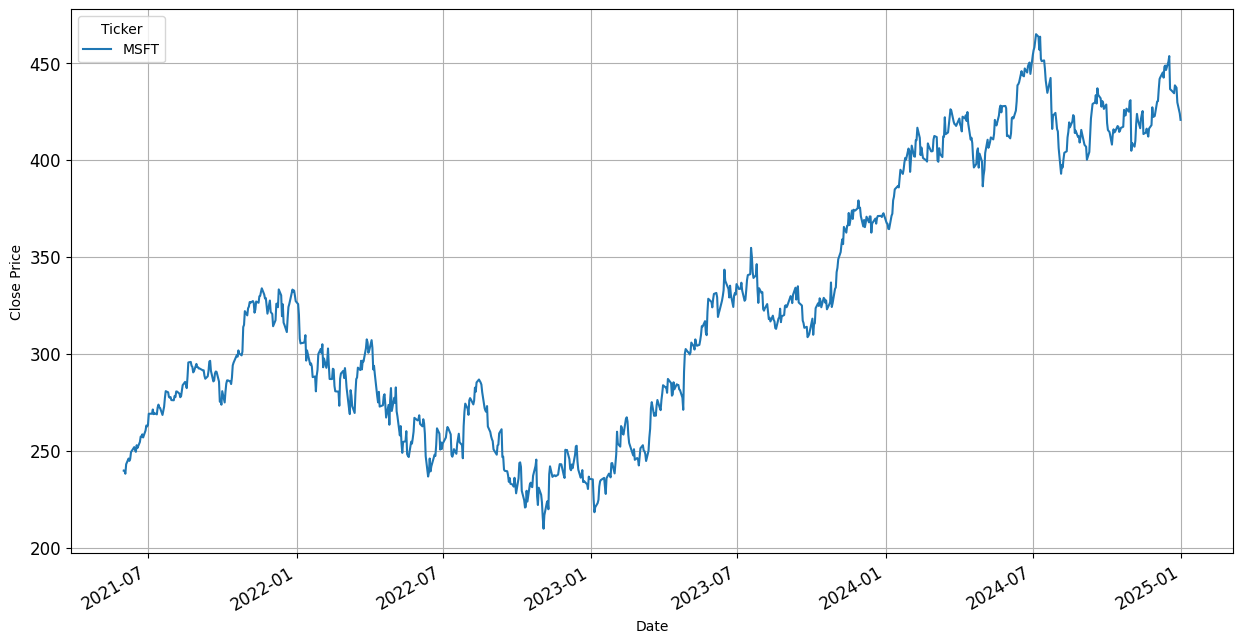

In [3]:
data['Close'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Close Price')
plt.show()

Simple Moving Averages

In [4]:
short_window = 50
long_window = 200
data['SMA50'] = data['Close'].rolling(window=short_window).mean()
data['SMA200'] = data['Close'].rolling(window=long_window).mean()

data

Price,Close,SMA50,SMA200
Ticker,MSFT,,
Date,,,
2021-06-01,239.764816,NaN,NaN
2021-06-02,239.667938,NaN,NaN
2021-06-03,238.126984,NaN,NaN
2021-06-04,243.050201,NaN,NaN
2021-06-07,245.976990,NaN,NaN
...,...,...,...
2024-12-24,438.450836,426.336816,422.775518
2024-12-26,437.233276,426.740137,422.901017


In [5]:
data['Signal_SMA'] = 0  
data['Signal_SMA'] = np.where(data['SMA50'] > data['SMA200'], 1, 0) 

data['Position_SMA'] = data['Signal_SMA'].diff()

data['Position_SMA'].dropna()
data

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA
Ticker,MSFT,,,,
Date,,,,,
2021-06-01,239.764816,NaN,NaN,0,NaN
2021-06-02,239.667938,NaN,NaN,0,0.0
2021-06-03,238.126984,NaN,NaN,0,0.0
2021-06-04,243.050201,NaN,NaN,0,0.0
2021-06-07,245.976990,NaN,NaN,0,0.0
...,...,...,...,...,...
2024-12-24,438.450836,426.336816,422.775518,1,0.0
2024-12-26,437.233276,426.740137,422.901017,1,0.0


In [6]:
data['Position_SMA'].unique()

array([nan,  0.,  1., -1.])

<function matplotlib.pyplot.show(close=None, block=None)>

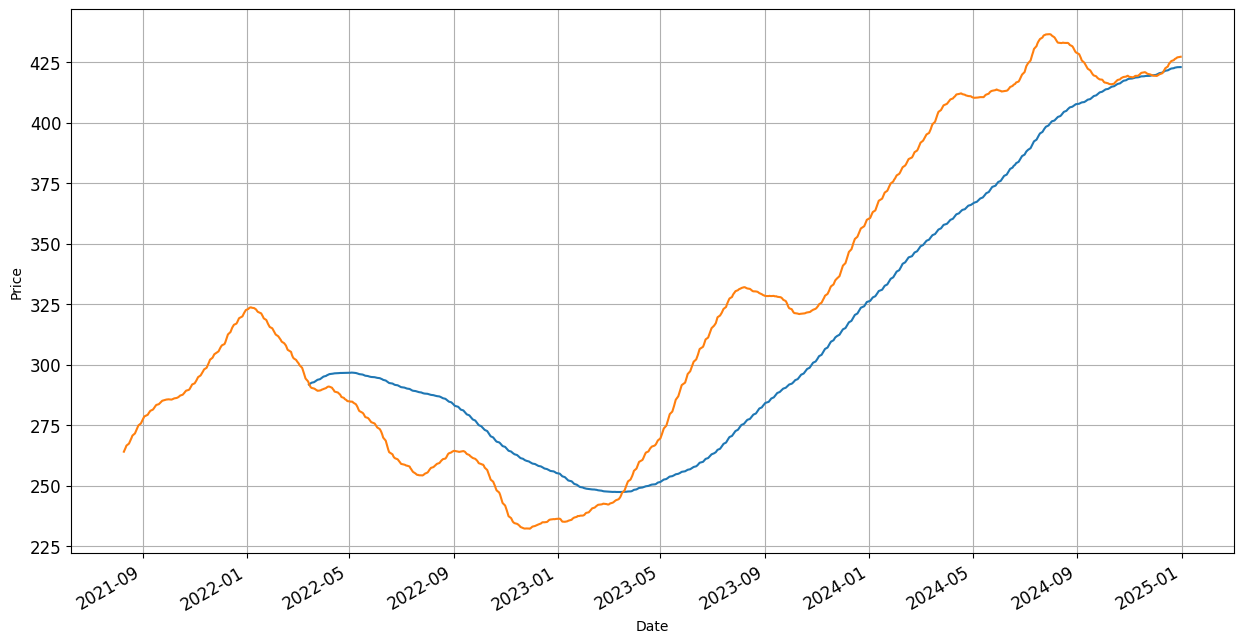

In [7]:
data['SMA200'].plot(figsize=(15,8), fontsize=12)
data['SMA50'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Price')
plt.show

In [8]:
data['Signal_SMA'] = 0  
data['Signal_SMA'] = np.where(data['SMA50'] > data['SMA200'], 1, 0) 

data['Position_SMA'] = data['Signal_SMA'].diff()

data

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA
Ticker,MSFT,,,,
Date,,,,,
2021-06-01,239.764816,NaN,NaN,0,NaN
2021-06-02,239.667938,NaN,NaN,0,0.0
2021-06-03,238.126984,NaN,NaN,0,0.0
2021-06-04,243.050201,NaN,NaN,0,0.0
2021-06-07,245.976990,NaN,NaN,0,0.0
...,...,...,...,...,...
2024-12-24,438.450836,426.336816,422.775518,1,0.0
2024-12-26,437.233276,426.740137,422.901017,1,0.0


In [ ]:
data.index = pd.to_datetime(data.index)
data_filtered = data[data.index > '2022-03-14']
data_filtered

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA,EMA50,EMA200,Signal_EMA,Position_EMA
Ticker,MSFT,,,,,,,,
Date,,,,,,,,,
2022-04-18,273.445679,288.497210,296.479713,0,0.0,291.003860,295.654563,0,0.0
2022-04-19,278.105133,288.107128,296.524832,0,0.0,290.497962,295.459137,0,0.0
2022-04-20,279.138397,287.834792,296.575069,0,0.0,290.052434,295.277609,0,0.0
2022-04-21,273.728363,287.384023,296.587256,0,0.0,289.412199,295.038208,0,0.0
2022-04-22,267.119385,286.671697,296.578562,0,0.0,288.537871,294.728402,0,0.0
...,...,...,...,...,...,...,...,...,...
2024-12-24,438.450836,426.336816,422.775518,1,0.0,429.977550,414.993025,1,0.0
2024-12-26,437.233276,426.740137,422.901017,1,0.0,430.262088,415.214348,1,0.0


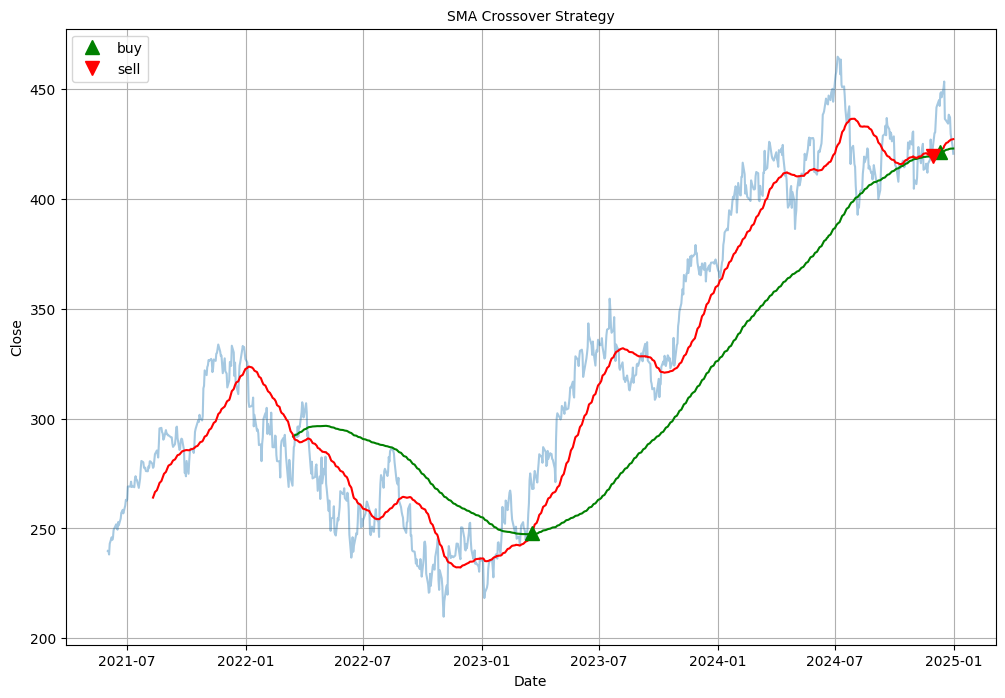

In [19]:
plt.figure(figsize=(12,8))

plt.plot(data['Close'], alpha=0.4)
plt.plot(data['SMA200'],color='g')
plt.plot(data['SMA50'], color='r')



plt.plot(data_filtered[data_filtered['Position_SMA'] == 1].index, 
         data_filtered['SMA50'][data_filtered['Position_SMA'] == 1], 
         '^', markersize = 10, color = 'g', alpha = 1, label = 'buy')


plt.plot(data_filtered[data_filtered['Position_SMA'] == -1].index, 
         data_filtered['SMA50'][data_filtered['Position_SMA'] == -1], 
         'v', markersize = 10, color = 'r', alpha = 1, label = 'sell')
plt.ylabel('Close', fontsize = 10 )
plt.xlabel('Date', fontsize = 10 )
plt.title('SMA Crossover Strategy', fontsize = 10)
plt.legend()
plt.grid()
plt.show()

In [10]:
short_window = 50
long_window = 200

data['EMA50'] = data['Close'].ewm(span=short_window).mean()

data['EMA200'] = data['Close'].ewm(span=long_window).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

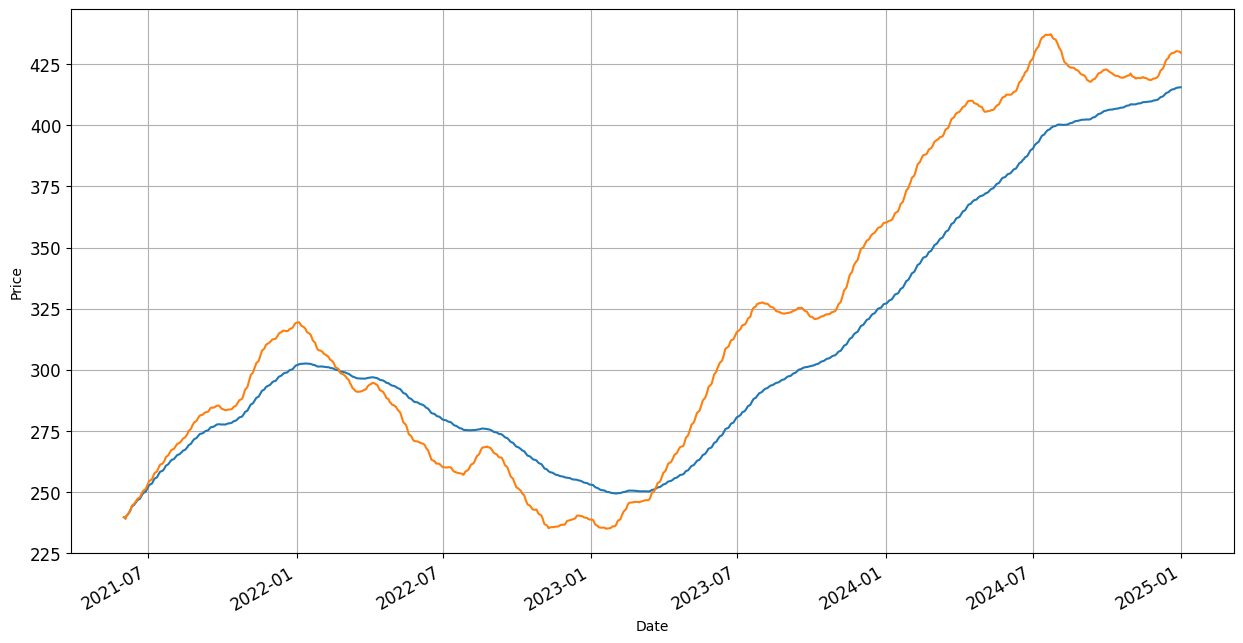

In [11]:
data['EMA200'].plot(figsize=(15,8), fontsize=12)
data['EMA50'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Price')
plt.show

Buy and Sell Signals

In [12]:
data['Signal_EMA'] = 0  
data['Signal_EMA'] = np.where(data['EMA50'] > data['EMA200'], 1, 0) 

data['Position_EMA'] = data['Signal_EMA'].diff()

data.head(10)

Price,Close,SMA50,SMA200,Signal_SMA,Position_SMA,EMA50,EMA200,Signal_EMA,Position_EMA
Ticker,MSFT,,,,,,,,
Date,,,,,,,,,
2021-06-01,239.764816,NaN,NaN,0,NaN,239.764816,239.764816,0,NaN
2021-06-02,239.667938,NaN,NaN,0,0.0,239.715408,239.716135,0,0.0
2021-06-03,238.126984,NaN,NaN,0,0.0,239.164616,239.181112,0,0.0
2021-06-04,243.050201,NaN,NaN,0,0.0,240.195058,240.162942,1,1.0
2021-06-07,245.976990,NaN,NaN,0,0.0,241.445767,241.349123,1,0.0
2021-06-08,244.775253,NaN,NaN,0,0.0,242.057621,241.934515,1,0.0
2021-06-09,245.763779,NaN,NaN,0,0.0,242.652679,242.498100,1,0.0
2021-06-10,249.301117,NaN,NaN,0,0.0,243.604633,243.378536,1,0.0


Plotting the graph

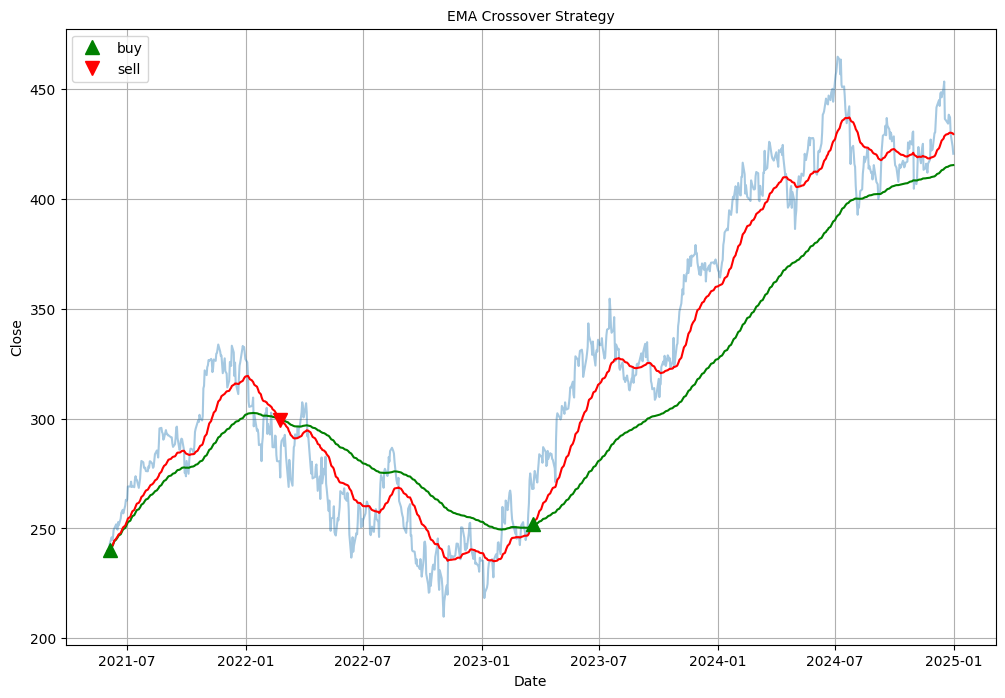

In [13]:
plt.figure(figsize=(12,8))

plt.plot(data['Close'], alpha=0.4)
plt.plot(data['EMA200'],color='g')
plt.plot(data['EMA50'], color='r')



plt.plot(data[data['Position_EMA'] == 1].index, 
         data['EMA50'][data['Position_EMA'] == 1], 
         '^', markersize = 10, color = 'g', alpha = 1, label = 'buy')


plt.plot(data[data['Position_EMA'] == -1].index, 
         data['EMA50'][data['Position_EMA'] == -1], 
         'v', markersize = 10, color = 'r', alpha = 1, label = 'sell')
plt.ylabel('Close', fontsize = 10 )
plt.xlabel('Date', fontsize = 10 )
plt.title('EMA Crossover Strategy', fontsize = 10)
plt.legend()
plt.grid()
plt.show()